In [26]:
#mountdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#set data path

data_path='/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification'
train_data_path='/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train'
test_data_path='/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test'

In [28]:
#set image height and width
image_height,image_width =(200,200)

In [29]:
#find the number of subfolders in both train and  test using glob
#import the  glob package
import glob
from glob import glob

In [30]:
#subfolders in train data
glob('/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/*')

['/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/buildings',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/forest',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/glacier',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/mountain',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/sea',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/street']

In [31]:
#subfolders in test data
glob('/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/*')

['/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/buildings',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/sea',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/forest',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/glacier',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/street',
 '/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/test/mountain']

## Import necessary packages
* numpy
* tensorflow
* keras
* image data generator

In [32]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
#Preprocess the train data
preprocess_train_data=ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,horizontal_flip=True,)

In [34]:
#preprocess test data
preprocess_test_data=ImageDataGenerator(rescale=1./255)

In [35]:
#name the labels folder as in test data
labels=['glacier','mountain','buildings','forest','sea','street']

## Traning the data

**find the total number of images belonging to all the classes **

In [46]:
#train data
train_data=preprocess_train_data.flow_from_directory(train_data_path, target_size=(image_height,image_width),classes=labels, class_mode='categorical',batch_size= 30)
#test data
test_data=preprocess_test_data.flow_from_directory(test_data_path,target_size=(image_height,image_width), classes=labels,class_mode='categorical',batch_size=30)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


**Develop the architecture**

In [37]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu,softmax

(150, 150, 3)


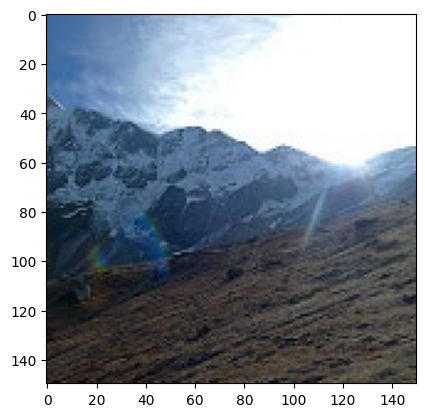

In [38]:
#reading an image
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/train/glacier/10009.jpg')
plt.imshow(img)
print(img.shape)

In [40]:
model=Sequential()
model.add(Conv2D(550,kernel_size=(3,3),input_shape=(image_height,image_width,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(400,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(350,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(200,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(50,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(25,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#convert it to 1d array
model.add(Flatten())

#give the above model to ANN
model.add(Dense(36,activation='relu')) # hidden layer 1
model.add(Dense(24,activation='relu')) # hidden layer 2
model.add(Dense(17,activation='relu')) # hidden layer 3
model.add(Dense(9,activation='relu')) # hidden layer 4

# output layer
model.add(Dense(6,activation='softmax'))



In [41]:
#mosel summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 200, 200, 550)     15400     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 100, 100, 550)     0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 100, 100, 400)     1980400   
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 50, 50, 400)       0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 50, 50, 350)       1260350   
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 25, 25, 350)      

In [47]:
#After model summary,compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['Accuracy'])

In [50]:
#fit the model
model.fit(train_data , epochs = 10)

Epoch 1/10
468/468 [==============================] - 276s 588ms/step - loss: 0.7003 - Accuracy: 0.7413
Epoch 2/10
468/468 [==============================] - 275s 587ms/step - loss: 0.6555 - Accuracy: 0.7592
Epoch 3/10
468/468 [==============================] - 275s 586ms/step - loss: 0.6044 - Accuracy: 0.7791
Epoch 4/10
468/468 [==============================] - 275s 587ms/step - loss: 0.5674 - Accuracy: 0.7946
Epoch 5/10
468/468 [==============================] - 274s 585ms/step - loss: 0.5241 - Accuracy: 0.8163
Epoch 6/10
468/468 [==============================] - 276s 589ms/step - loss: 0.5040 - Accuracy: 0.8226
Epoch 7/10
468/468 [==============================] - 275s 588ms/step - loss: 0.4718 - Accuracy: 0.8325
Epoch 8/10
468/468 [==============================] - 275s 586ms/step - loss: 0.4613 - Accuracy: 0.8389
Epoch 9/10
468/468 [==============================] - 275s 586ms/step - loss: 0.4441 - Accuracy: 0.8460
Epoch 10/10
468/468 [==============================] - 275s 587m

In [51]:
# Predicting the model on preprocessed test data
predict_test= model.predict(test_data)

100/100 [==============================] - 747s 8s/step


In [53]:
#to create a validation report--1.get the classes--2
test_data.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [54]:
print(predict_test)

[[7.06087472e-03 1.40201871e-03 5.14552277e-03 9.84819651e-01
  2.05118204e-06 1.56994525e-03]
 [3.37994665e-01 4.57355350e-01 8.83765891e-02 1.67403426e-02
  8.96655545e-02 9.86749679e-03]
 [4.23816266e-03 1.62255950e-03 4.55472589e-01 3.84249608e-03
  9.07876156e-03 5.25745451e-01]
 ...
 [5.47135869e-06 4.15352694e-08 7.29228253e-04 4.80491008e-06
  1.67665384e-08 9.99260485e-01]
 [4.61827585e-05 2.86309159e-06 3.69971560e-04 9.99064386e-01
  9.66115105e-11 5.16702770e-04]
 [2.18663272e-02 1.32957194e-02 1.19810505e-02 9.30497754e-06
  9.49100554e-01 3.74703202e-03]]


In [55]:
predicted_points = np.argmax(predict_test  , axis = 1)
predicted_points

array([3, 1, 5, ..., 5, 3, 4])

In [57]:
#import Sklearn to find metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
#accuracy score
accuracy_score(test_data.classes , predicted_points)

0.171

In [58]:
confusion_matrix(test_data.classes , predicted_points)

array([[104, 113,  80,  82,  95,  79],
       [ 91,  92,  89,  75,  76, 102],
       [ 82,  89,  77,  57,  67,  65],
       [ 86,  88,  71,  87,  62,  80],
       [ 93,  91,  73,  91,  73,  89],
       [ 86,  93,  75,  90,  77,  80]])

In [59]:
print(classification_report(test_data.classes , predicted_points))

              precision    recall  f1-score   support

           0       0.19      0.19      0.19       553
           1       0.16      0.18      0.17       525
           2       0.17      0.18      0.17       437
           3       0.18      0.18      0.18       474
           4       0.16      0.14      0.15       510
           5       0.16      0.16      0.16       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



In [60]:
#import cv2 package
import cv2
#get the labels
labels

['glacier', 'mountain', 'buildings', 'forest', 'sea', 'street']

In [63]:
#create a function to take image from its path

def Prediction(path):      #create function
  image=plt.imread(path)   #read the image from path
  print(image.shape)       #print the shape of the image
  image=cv2.resize(image,(200,200)) # initially image size id fixed to the dimensions
  image = np.array(image) / 255.0   # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.expand_dims(image , axis = 0)
  print(image.shape)#need to make sure convert data into Deep learning CNN trained Manner
  result = model.predict(image)  # the predicted image is in the variable result
  print(result)
  sol = np.argmax(result , axis = 1) #
  print(sol[0])
  print(labels[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

(150, 150, 3)
(1, 200, 200, 3)
1/1 [==============================] - 1s 788ms/step
[[7.1963901e-04 2.0350404e-05 2.8976740e-03 5.6370493e-04 3.8164521e-06
  9.9579489e-01]]
5
street


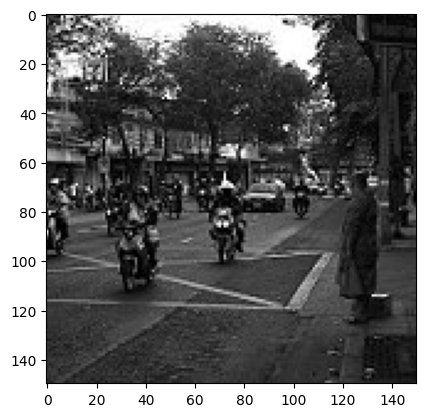

In [64]:
Prediction('/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/pred/3.jpg')

(150, 150, 3)
(1, 200, 200, 3)
1/1 [==============================] - 0s 128ms/step
[[7.6757567e-03 1.2213566e-02 7.1301893e-03 1.4802985e-06 9.7237045e-01
  6.0852955e-04]]
4
sea


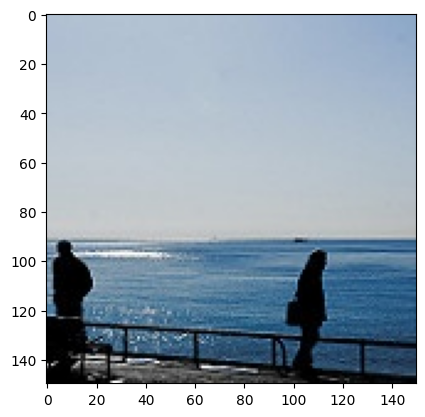

In [65]:
Prediction('/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/pred/25.jpg')

(150, 150, 3)
(1, 200, 200, 3)
1/1 [==============================] - 0s 29ms/step
[[2.8887002e-02 4.9317762e-02 9.7936047e-03 3.0948624e-05 9.1041780e-01
  1.5528352e-03]]
4
sea


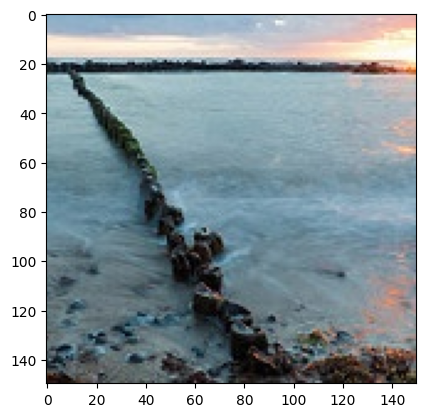

In [66]:
Prediction('/content/drive/MyDrive/CNN Projects/Naturalscenes-multilabel-cnn -classsification/pred/6.jpg')